## Тема 2. Сглаживающая аппроксимация в полиномиальных базисах

In [121]:
%matplotlib inline

import numpy as np
import scipy.linalg as la
import scipy.interpolate as interp
import scipy.integrate as integrate
import matplotlib as mpl
import matplotlib.pyplot as plt
import sympy

default_dpi = mpl.rcParamsDefault['figure.dpi']
factor = 1
mpl.rcParams['figure.dpi'] = default_dpi * factor

## Пример 1

### Формирование набора данных

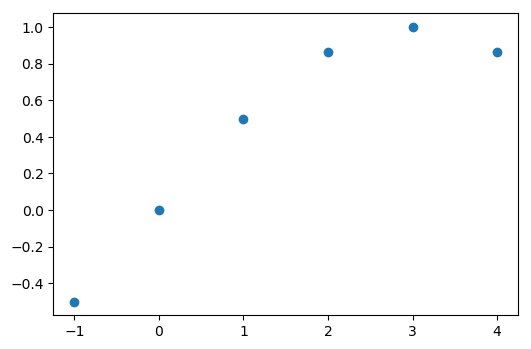

In [122]:
x = np.array([-1, 0, 1, 2, 3, 4])
y = np.array([-0.5, 0, 0.5, 0.86603, 1, 0.86603])
plt.plot (x,y, 'o')

### Аппроксимация полиномом 1-ой степени

[0.29131943 0.01836419]
[-0.22704476 -0.01836419  0.19031638  0.26502695  0.10767752 -0.3176119 ]
0.21245311205362433 0.14163540803574956


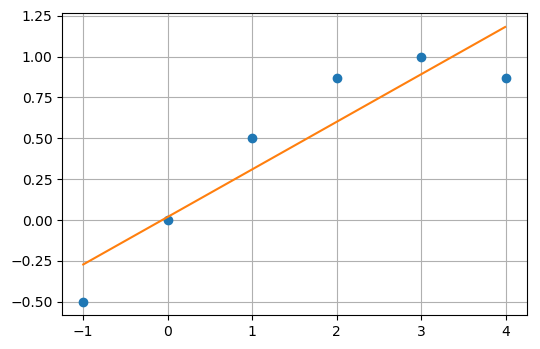

In [123]:
x = np.array([-1, 0, 1, 2, 3, 4])
y = np.array([-0.5, 0, 0.5, 0.86603, 1, 0.86603])

PolyCoef1 = np.polyfit(x, y, 1)
print (PolyCoef1)

def p (x, y, k_power):
    PolyCoef = np.polyfit(x, y, k_power)
    
    p = 0.
    for k in range(0, k_power+1):
        p += PolyCoef[k_power-k]*x**k
    
    return p 

def pl (x, y, x_plot, k_power):
    PolyCoef = np.polyfit(x, y, k_power)
    
    pl = 0.
    for k in range(0, k_power+1):
        pl += PolyCoef[k_power-k]*x_plot**k
    
    return pl

p1 = p (x, y, 1)

ErrorLocal = y - p1
ErrorGlobal = (np.sum ((ErrorLocal)**2)/len(x))**0.5

print (ErrorLocal)
print (ErrorGlobal,ErrorGlobal/(max(y)-min(y)))

x_plot = np.arange(-1, 4, 0.01)
y_plot1 = pl (x, y, x_plot, 1)
plt.grid()
plt.plot(x, y, 'o')
plt.plot(x_plot, y_plot1)

### Аппроксимация полиномом 2-ой степени

[ 0.04878679 -0.0735305  -0.03034886  0.04436171  0.05251121 -0.04178036]
0.05029732528271493 0.03353155018847662


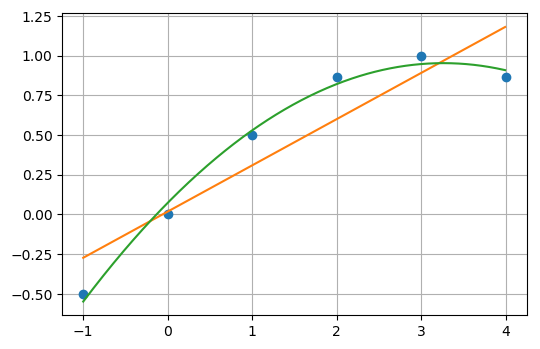

In [124]:
p2 = p (x, y, 2)

ErrorLocal = y - p2
ErrorGlobal = (np.sum ((ErrorLocal)**2)/len(x))**0.5

print (ErrorLocal)
print (ErrorGlobal,ErrorGlobal/(max(y)-min(y)))

x_plot = np.arange(-1, 4, 0.01)
y_plot1 = pl (x, y, x_plot, 1)
y_plot2 = pl (x, y, x_plot, 2)
plt.grid()
plt.plot(x, y, 'o')
plt.plot(x_plot, y_plot1)
plt.plot(x_plot, y_plot2)

### Матрично - векторная формулировка

In [125]:
n = len(x) # n - размер массива данных
m = 1   # m - степень полинома (количество базисных функций - 1)

def SqLeast (x, y, m):
    n = len(x)
    Phi = np.zeros ((n,m+1))
    for k in range (0, m+1):
        Phi[:,k] = BasicFunctions (k, x)
    PhiT = Phi.T
    G = PhiT @ Phi
    #print (Phi)
    #print (G)
    z = PhiT @ y
    #print (z)
    a = np.linalg.solve(G, z)
    #print(a)
    return a

def BasicFunctions (num, x):
    PhiFun = x**num
    return PhiFun  

PolynomCoefs = SqLeast (x, y, 1)
print (PolynomCoefs)

[0.01836419 0.29131943]


In [126]:
PolynomCoefs = SqLeast (x, y, 2)
print (PolynomCoefs)

[ 0.0735305   0.53956782 -0.08274946]


## Пример 2

### Формирование набора данных

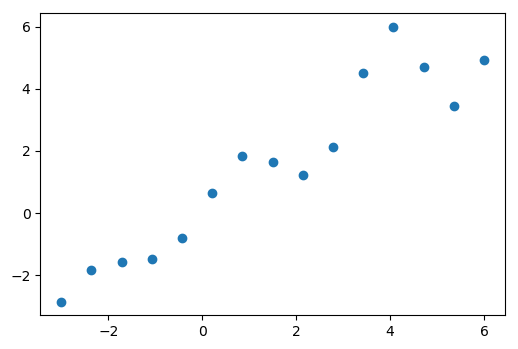

In [127]:
xleft = -3
xright = 6
n = 15
x = np.linspace(xleft,xright,n)
yf = np.zeros ((n))
for i in range(0,n):
    if (x[i]<0) :
        yf[i] = 1.0*x[i] + 0.5*np.sin(2*x[i])
    elif (x[i]<np.pi):
        yf[i] = 1.0*x[i] + 1.0*np.sin(2*x[i])
    else:
        yf[i] = 1.0*x[i] + 2.0*np.sin(2*x[i])
plt.plot (x,yf, 'o')

### Нормально распределенная случайная величина

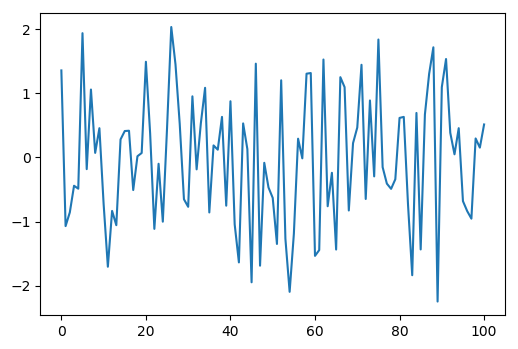

In [128]:
Delta1 = 1.0 * np.random.randn(101)
plt.plot (Delta1)

(array([0.09258873, 0.09258873, 0.1388831 , 0.18517746, 0.1388831 ,
        0.23147183, 0.41664929, 0.27776619, 0.32406056, 0.23147183,
        0.32406056, 0.37035492, 0.55553238, 0.23147183, 0.1388831 ,
        0.18517746, 0.27776619, 0.27776619, 0.04629437, 0.1388831 ]),
 array([-2.24580105, -2.03193074, -1.81806044, -1.60419013, -1.39031982,
        -1.17644951, -0.9625792 , -0.7487089 , -0.53483859, -0.32096828,
        -0.10709797,  0.10677233,  0.32064264,  0.53451295,  0.74838326,
         0.96225356,  1.17612387,  1.38999418,  1.60386449,  1.81773479,
         2.0316051 ]),
 <a list of 20 Patch objects>)

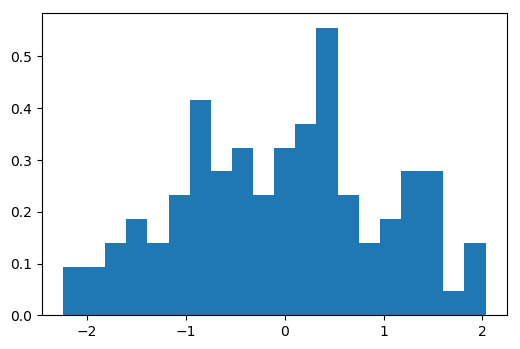

In [129]:
num_bins = 20
plt.hist(Delta1, num_bins, density=1)

### Зашумление данных

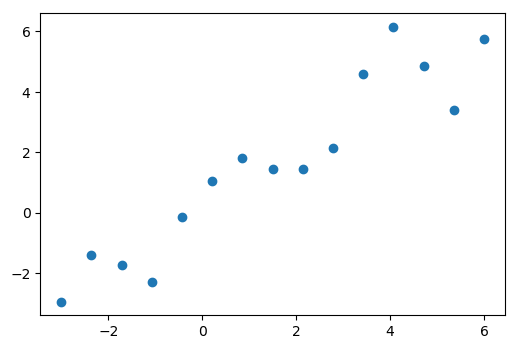

In [130]:
Delta = 0.5 * np.random.randn(n)
y = yf + Delta
plt.plot (x, y, 'o')

### Аппоксимационные полиномы

[0.17211597 0.95752712]
0.972793299985282 0.10707066583464626


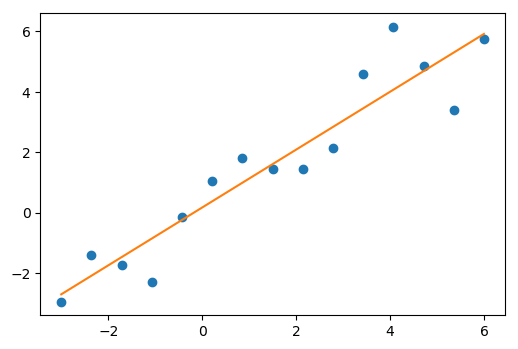

In [131]:
m = 1
PolynomCoefs = SqLeast (x, y, m)
print (PolynomCoefs)

PolynomValue = np.zeros(len(x))
for i in range (0, m+1):
    PolynomValue += PolynomCoefs[i]*x**i
        
ErrorLocal = y - PolynomValue
ErrorGlobal = (np.sum ((ErrorLocal)**2)/len(x))**0.5

print (ErrorGlobal, ErrorGlobal/(max(y)-min(y)))

plt.plot (x, y, 'o')
plt.plot (x, PolynomValue)

Delta = 0.5 * np.random.randn(n)
y = yf + Delta
#y = y + Delta
PolynomCoefs = SqLeast (x, y, m)
#print (PolynomCoefs)
PolynomValue = np.zeros(len(x))
for i in range (0, m+1):
    PolynomValue += PolynomCoefs[i]*x**i
#plt.plot (x, PolynomValue)